In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

# Matrizes
Matrizes são estruturas fundamentais em ciência de dados, especialmente quando se trabalha com grandes conjuntos de dados e operações matemáticas. Elas são usadas principalmente para representar dados tabulares, realizar cálculos numéricos, e aplicar algoritmos de aprendizado de máquina.

## Definição
Uma matriz é uma coleção de números organizados em linhas e colunas.
__Exemplo:__ 3×2 tem 3 linhas e 2 colunas:

                              12
                              34
                              56

Nesse caso, o número 1 está na posição (1,1), o número 4 está na posição (2,2) e assim por diante.

## Uso de Matrizes em Ciência de Dados
- Representação de Dados: Dados tabulares podem ser representados como matrizes, onde as linhas podem representar observações (amostras) e as colunas, características (variáveis). Por exemplo, em um dataset sobre carros, cada linha pode representar um carro e as colunas, atributos como peso, velocidade e preço.

- Operações Matriciais: Operações como multiplicação de matrizes, transposição e inversão são usadas em várias análises estatísticas e modelos de aprendizado de máquina.
 Essas operações são essenciais para técnicas como regressão linear, onde é preciso resolver equações matriciais.

- Álgebra Linear: A álgebra linear é a base matemática de muitos algoritmos de ciência de dados, incluindo decomposições matriciais como a decomposição de valores singulares (SVD) e a decomposição de autovalores (Eigenvalues), que são usadas para redução de dimensionalidade (ex: PCA).

In [ ]:
# Entendendo Matriz
matriz = np.array([[1, 2],
                   [3, 4],
                   [5, 6]])
print(matriz)

[[1 2]
 [3 4]
 [5 6]]


# Multiplicação de Matrizes
Na multiplicação de duas matrizes
A e B, o número de __colunas de A__ deve ser igual ao número de __linhas de B.__

A fórmula para multiplicação de duas matrizes __𝐴𝑚×𝑛__ e __𝐵𝑛×𝑝__​  resulta em uma matriz __𝐶𝑚×𝑝__.

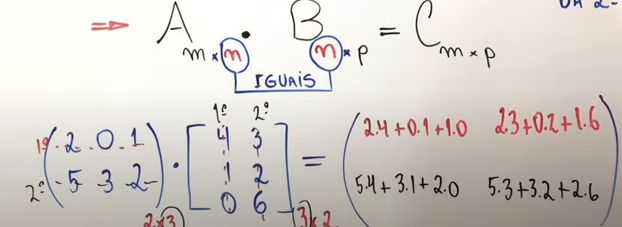

In [ ]:
# Multiplicação de Matrizes
a = np.array([[2,0,1],
              [5,3,2]])


b = np.array([[4,3],
              [1,2],
              [0,6]])

c = np.dot(a, b)
print(c)


[[ 8 12]
 [23 33]]


## Determinante de Matriz
O determinante é calculado apenas para matrizes quadradas (mesmo número de linhas e colunas). Ele nos dá informações importantes, como se a matriz é invertível.

In [ ]:
# Matriz quadrada (2x2)
matriz_2x2 = np.array([[1, 2],
                       [3, 4]])

# Cálculo do determinante
determinante = np.linalg.det(matriz_2x2)
print("Determinante de matriz_2x2:", determinante)


Determinante de matriz_2x2: -2.0000000000000004


# Inversão de Matriz
A inversa de uma matriz quadrada 𝐴 é tal que 𝐴×𝐴−1=𝐼 onde '𝐼' é a matriz identidade. Nem todas as matrizes possuem inversa; uma matriz só é invertível se seu determinante for diferente de zero.

In [ ]:
# Matriz quadrada (2x2)
matriz_invertivel = np.array([[1, 2],
                              [3, 4]])

# Inversão da matriz
inversa = np.linalg.inv(matriz_invertivel)
print("Inversa de matriz_invertivel:\n", inversa)


Inversa de matriz_invertivel:
 [[-2.   1. ]
 [ 1.5 -0.5]]


# Transposição de Matriz

linhas viram colunas e colunas viram linhas

In [ ]:
# Matriz original (3x2)
matriz = np.array([[1, 2],
                   [3, 4],
                   [5, 6]])

# Transposição
transposta = matriz.T
print("Transposição de matriz:\n", transposta)

Transposição de matriz:
 [[1 3 5]
 [2 4 6]]


### Exercicio

Criar uma Matriz e descobrir se ela tem inversão
- se tiver, printar

In [ ]:
# Exercicio
import numpy as np

# Definindo a matriz
matriz = np.array([[1, 3, 4],
                   [3, 4, 1],
                   [2, 4, 0]])

# Calculando o determinante
determinante = np.linalg.det(matriz)
# print(determinante)

# Verificando se a matriz é invertível
if determinante != 0:
    inversa = np.linalg.inv(matriz)
    print("A matriz é invertível. Sua inversa é:\n", inversa)
else:
    print("A matriz não é invertível.")


A matriz é invertível. Sua inversa é:
 [[-0.22222222  0.88888889 -0.72222222]
 [ 0.11111111 -0.44444444  0.61111111]
 [ 0.22222222  0.11111111 -0.27777778]]


# Voltando Para as Origens

In [ ]:
def limpeza(caminho):
  df = pd.read_csv(caminho)
  # mask apto
  mask_apt = df['property_type'] == "apartment"
  # mask ba
  mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
  # mask price
  mask_price = df['price_aprox_usd'] < 400_000
  # mask quantis
  low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
  mask_qnt = df['surface_covered_in_m2'].between(low, high)
  # add mask
  df = df[mask_apt & mask_ba & mask_price & mask_qnt]
  # Arrumando lat-lon
  df[['lat','lon']] = df['lat-lon'].str.split(',', expand=True).astype(float)
  df.drop(columns=['lat-lon'], inplace=True)

  return df

df = limpeza('drive/MyDrive/Buenos-Aires-2/buenos-aires-1.csv')

- operation: Tipo de operação para o imóvel, como "venda" ou "aluguel".

- property_type: Tipo de propriedade, como "apartamento", "casa", "terreno", etc.

- place_with_parent_names: Localização do imóvel com nomes dos locais e seus respectivos pais, indicando o bairro e a cidade, por exemplo.

- lat-lon: Coordenadas geográficas (latitude e longitude) do imóvel. Esta coluna pode conter dados ausentes se a localização não for especificada.

- price: Preço do imóvel na moeda local.

- currency: Moeda utilizada para o preço do imóvel, como "USD", "EUR", "ARS" (peso argentino), etc.

- price_aprox_local_currency: Preço aproximado do imóvel em moeda local, ajustado para variações de câmbio.

- price_aprox_usd: Preço aproximado do imóvel em dólares americanos (USD).

- surface_total_in_m2: Área total do imóvel em metros quadrados. Esta coluna pode conter dados ausentes para imóveis cujas áreas não foram especificadas.

- surface_covered_in_m2: Área coberta do imóvel em metros quadrados, indicando a área útil que pode ser usada.

- price_usd_per_m2: Preço do imóvel em dólares americanos por metro quadrado, calculado a partir do preço total e da área coberta.

- price_per_m2: Preço do imóvel por metro quadrado na moeda local, calculado a partir do preço total e da área coberta.

- floor: Andar em que o imóvel está localizado, se aplicável (geralmente para apartamentos).

- rooms: Número de quartos no imóvel.

- expenses: Custos adicionais associados ao imóvel, como taxas de condomínio, impostos, etc. Esta coluna pode conter valores em formato de texto.

- properati_url: URL para a página do imóvel em um site de listagens, como o Properati, onde você pode encontrar mais detalhes sobre o imóvel.

### Exercício

- Fazer o DataFrame retornar apenas __Apartamentos__ da 'Capital Federal' que custem menos de $400,000 USD
- Separar 'lat-lon' e criar duas novas colunas: 'lat'  'lon'
- Dropar coluna 'lat-lon' depois de arrumado

### Exercício
Crie um histograma de "surface_covered_in_m2". Certifique-se de que o eixo x tenha o rótulo "Área [m²]" e que o gráfico tenha o título "Distribuição dos Tamanhos dos Apartamentos".

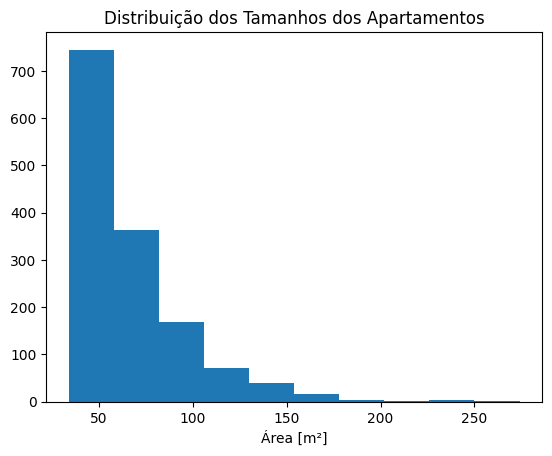

In [ ]:
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Área [m²]')
plt.title('Distribuição dos Tamanhos dos Apartamentos');

# Quantis

Quantis são valores que dividem um conjunto de dados em partes iguais com base em sua distribuição. Eles ajudam a entender a dispersão e a localização dos dados.

__Termos relacionados:__

- Percentil: Divide os dados em 100 partes iguais. Por exemplo, o 25º percentil (ou primeiro quartil) é o valor abaixo do qual 25% dos dados se encontram.

- Quartis: Dividem os dados em quatro partes iguais:

  - Primeiro Quartil (Q1): O 25º percentil, que é o valor abaixo do qual 25% dos dados estão.
  - Segundo Quartil (Q2): Também conhecido como a mediana (50º percentil), o valor abaixo do qual 50% dos dados estão.
  - Terceiro Quartil (Q3): O 75º percentil, que é o valor abaixo do qual 75% dos dados estão.

- Decis: Dividem os dados em 10 partes iguais.

- Quantis gerais: Dividem os dados em n partes iguais. Por exemplo, o quantil 0.1 é o valor abaixo do qual 10% dos dados estão, e o quantil 0.9 é o valor abaixo do qual 90% dos dados estão.

Em resumo, quantis ajudam a identificar a distribuição dos dados e a detectar possíveis outliers, comparando as observações com os valores de referência (como os 10% inferiores ou 90% superiores).



### Exercício: Verificar Outliers
Calcule as estatísticas resumidas para o DataFrame df usando o método describe.

In [ ]:
df['surface_covered_in_m2'].describe()

,surface_covered_in_m2
count,1635.000000
mean,97.877064
std,1533.057610
min,0.000000
25%,38.000000
50%,50.000000
75%,73.000000
max,62034.000000


### Exercício


Adicione à sua função de tratamento (limpeza) para remover observações que são outliers na coluna "surface_covered_in_m2".

Especificamente, todas as observações devem estar entre os quantis 0.1 e 0.9 para "surface_covered_in_m2".

🗽 Agora que nosso conjunto de dados está livre de valores discrepantes, é hora de começar a explorar a relação entre tamanho e preço do apartamento.🗽

### Exercício

Crie um gráfico de dispersão (scatter) que mostre o preço ("price_aprox_usd") versus a área ("surface_covered_in_m2") em nosso conjunto de dados. Certifique-se de rotular o eixo x como "Área [m²]" e o eixo y como "Preço [USD]".

Text(0.5, 1.0, 'Area X Preço')

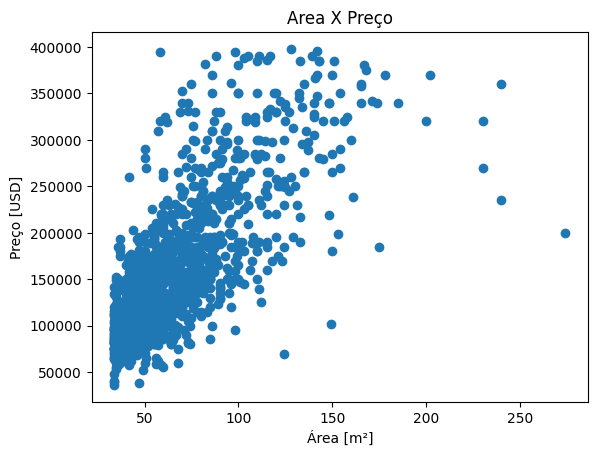

In [ ]:
plt.scatter(x = df['surface_covered_in_m2'], y = df['price_aprox_usd'])
plt.xlabel('Área [m²]')
plt.ylabel('Preço [USD]')
plt.title('Area X Preço')

# Machine Learning

# x_train e y_train
- __X_train__ é uma matriz de características (ou variáveis independentes) que você usa para treinar um modelo de aprendizado de máquina.

  - __Características (Features):__ As colunas em X_train representam as características ou variáveis independentes que o modelo usará para aprender e fazer previsões. No exemplo fornecido, X_train contém apenas uma característica: "surface_covered_in_m2".

  - __Formato Bidimensional:__ X_train deve ser bidimensional, o que significa que ele deve ter a forma de uma tabela ou matriz. Cada linha representa uma observação (ou exemplo) e cada coluna representa uma característica. Mesmo que haja apenas uma característica, a estrutura deve ser uma matriz, não um vetor.

  - __Treinamento do Modelo:__ Durante o treinamento, o modelo usa X_train para aprender padrões e relacionamentos entre as características e a variável alvo (ou dependente), que é o que você está tentando prever.

  - __Previsão:__ Após o modelo ser treinado com X_train, ele pode usar novos dados (também formatados como X_train) para fazer previsões.

- __y_train__ representa a variável alvo (ou variável dependente) que você deseja prever ou modelar.

  - __Variável Alvo (Target Variable):__ y_train é a variável que você deseja que o modelo aprenda a prever. No exemplo de previsão de preço de apartamentos, y_train seria a coluna com os preços dos apartamentos.

  - __Formato:__ y_train geralmente é uma série ou vetor unidimensional que contém os valores de resposta correspondentes às observações em X_train. Cada valor em y_train corresponde a uma linha em X_train.

  - __Treinamento do Modelo:__ Durante o treinamento, o modelo usa X_train para aprender como as características (features) estão relacionadas à variável alvo em y_train. O objetivo é ajustar os parâmetros do modelo para minimizar o erro entre as previsões e os valores reais de y_train.

  - __Previsão:__ Após o treinamento, o modelo usa o que aprendeu para prever valores para novos dados. Para isso, ele compara os valores previstos com os valores reais de y_test (o conjunto de teste), que serve para avaliar a performance do modelo.

### Exercício
Crie a matriz de características chamada X_train, que você usará para treinar seu modelo. Ela deve conter apenas uma característica: ["surface_covered_in_m2"]. Lembre-se de que sua matriz de características deve sempre ser bidimensional.

In [ ]:
features = 'surface_covered_in_m2'
X_train = df[features]

### Exercicio:
Crie o vetor alvo chamado `y_train`, que você usará para treinar seu modelo. Seu alvo deve ser "price_aprox_usd". Lembre-se de que, na maioria dos casos, seu vetor alvo deve ser unidimensional.

In [ ]:
target = 'price_aprox_usd'
y_train = df[target]

# Problemas de regressão em machine learning
Referem-se à tarefa de prever um valor contínuo com base em variáveis de entrada.

Diferente da classificação, onde a saída é categórica, na regressão, o objetivo é prever uma quantidade numérica. Alguns exemplos incluem prever o preço de uma casa, o valor de vendas ou a temperatura.

- __Principais tipos de regressão:__
  - Regressão Linear Simples:

    Utiliza uma única variável independente para prever a variável dependente.

    __Exemplo:__ Prever o preço de uma casa baseado apenas na área construída.

  - Regressão Linear Múltipla:

    Utiliza várias variáveis independentes para prever uma variável dependente.

    __Exemplo:__ Prever o preço de uma casa com base na área, número de quartos, localização, etc.
  - Regressão Polinomial:

    A relação entre as variáveis não é linear, mas pode ser modelada como uma função polinomial.
    
    __Exemplo:__ Prever a aceleração de um carro com base em diferentes parâmetros não lineares.
  - Regressão Logística (apesar de ser frequentemente usada em classificação):

    Modela a probabilidade de um evento ocorrer, mas pode ser aplicada a problemas de regressão onde a saída é contínua e limitada a um intervalo (como entre 0 e 1).
  - Regressão Ridge e Lasso:

    Técnicas de regularização usadas para melhorar a precisão dos modelos lineares, penalizando a complexidade do modelo para evitar overfitting.
  - Regressão com Árvores de Decisão:

    Usa árvores de decisão para fazer previsões, particionando os dados em subconjuntos mais simples.
    __Variantes incluem Random Forest e Gradient Boosting.__

- __Métricas de Avaliação:__
  As métricas de avaliação de regressão são usadas para medir o desempenho de modelos de machine learning em problemas onde a saída é contínua. Elas ajudam a quantificar o quão bem o modelo prevê os valores esperados em comparação com os valores reais.
  - Erro Médio Absoluto (MAE): Média dos valores absolutos dos erros.
  - Erro Quadrático Médio (MSE): Média dos quadrados dos erros.
  - Raiz do Erro Quadrático Médio (RMSE): Raiz quadrada do MSE.
  - R² (Coeficiente de Determinação): Mede o quanto da variação da variável dependente é explicada pelas variáveis independentes.

Para prever o preço de casas com base no tamanho, o processo envolve usar aprendizado de máquina, onde você define a variável independente (o tamanho da casa) como __X_train__ e a variável dependente (o preço da casa) como __y_train.__

Vamos entender mais sobre a previsão de base __(baseline prediction)__ e a média de y __(y_mean).__

- y_mean é simplesmente a média dos valores da variável alvo (y_train), ou seja, o preço médio das casas.

  Poderemos usar essa média para prever o preço de todas as casas, independentemente de suas outras características.

- pred_baseline é uma lista de vários números repetidos, e todos eles são iguais à média de y_train. A ideia por trás do baseline prediction é criar uma previsão muito simples, que serve como ponto de partida para compararmos com previsões mais avançadas.

  __Objetivo:__ O objetivo de um baseline é fornecer uma linha de base (ou ponto de referência) para avaliar outros modelos.


### Exercício
Calcule a média do seu vetor alvo y_train e atribua-a à variável y_mean.

In [ ]:
y_mean = y_train.mean()
print(y_mean)

154146.39659589526


Agora que temos a única previsão que nosso modelo simples sempre fará, precisamos gerar uma lista que repita a previsão para cada observação em nosso conjunto de dados.

__OBS:__(A única previsão que o modelo simples faria seria a média dos valores no vetor alvo (y_train). Esse tipo de modelo simples, às vezes chamado de "dumb model" ou "modelo ingênuo", simplesmente prevê o valor médio para todas as observações, independentemente das variáveis de entrada.)

### Exercício
Crie uma lista chamada y_pred_baseline que contenha o valor de y_mean repetido, de modo que tenha o mesmo comprimento de y_train.

In [ ]:
# Jeito 1
# y_pred_baseline = [y_mean] * len(y_train)

# Jeito 2
y_pred_baseline = []
for i in range(len(y_train)):
  y_pred_baseline.append(y_mean)

len(y_train) == len(y_pred_baseline)

True

# Line Plot
Um line plot em português é chamado de gráfico de linha. É um tipo de gráfico que conecta pontos de dados por meio de uma linha, geralmente usado para visualizar tendências ou a relação entre duas variáveis ao longo de um intervalo.

### Exercício:
Crie um line plot que mostre a relação entre as observações X_train e as previsões do nosso modelo simples y_pred_baseline. Certifique-se de que a cor da linha seja laranja e que ela tenha o rótulo "Modelo Base".

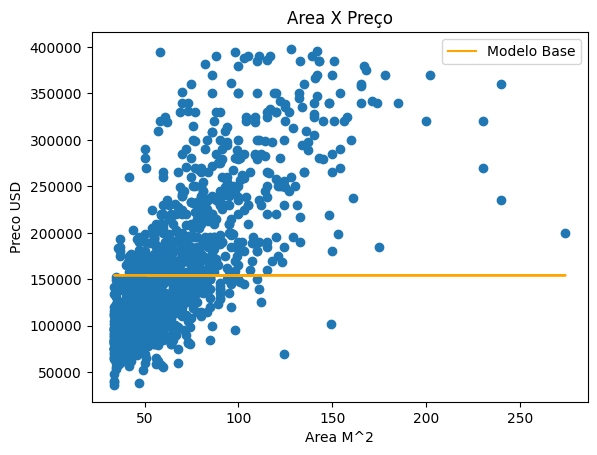

In [ ]:
plt.plot(X_train, y_pred_baseline, color = 'orange', label = 'Modelo Base')
plt.scatter(X_train, y_train)
plt.xlabel('Area M^2')
plt.ylabel('Preco USD')
plt.title('Area X Preço')
plt.legend()

Olhando para essa visualização, parece que nosso modelo base realmente não segue a tendência dos dados. Mas, como um cientista de dados, você não pode depender apenas de um gráfico subjetivo para avaliar um modelo.

Você precisa de uma métrica de desempenho exata e matematicamente calculada. Existem muitas métricas de desempenho, mas a que usaremos aqui é o erro absoluto médio.

# MAE
- __Fórmula:__

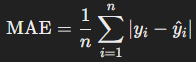

- Onde:
  - 𝑦𝑖 é o valor real,
  - 𝑦^𝑖​ é o valor previsto,
  - 𝑛 é o número de amostras.

### Exercício:
Calcule o erro absoluto médio base para suas previsões em y_pred_baseline em comparação com os alvos reais em y_train

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 154146.4
Baseline MAE: 58440.38


O que essas informações nos dizem? Se sempre prevíssemos que o preço de um apartamento é de $154146.4

Nossas previsões estariam erradas, em média, em $58440.38.

Isso também nos diz que nosso modelo precisa ter um erro absoluto médio abaixo de $58440.38 para ser útil.

## Iterar
O próximo passo na construção de um modelo é a iteração. Isso envolve construir um modelo, treiná-lo, avaliá-lo e, em seguida, repetir o processo até que você esteja satisfeito com o desempenho do modelo. Mesmo que o modelo que estamos construindo seja linear, o processo de iteração raramente segue uma linha reta.

Esteja preparado para tentar coisas novas, enfrentar becos sem saída e esperar enquanto seu computador realiza longos cálculos para treinar seu modelo. ☕️ Vamos começar!

A primeira coisa que precisamos fazer é criar nosso modelo — neste caso, um que usa regressão linear.

# Regressão Linear
Um dos modelos que você pode usar para problemas de regressão é chamado de regressão linear.

Na sua forma mais simples, ajustamos um modelo que irá prever uma única variável de saída (chamada de vetor alvo) como uma função linear de uma única variável de entrada (chamada de matriz de características).

Falando matematicamente, se temos pontos de dados de entrada
𝑥 e a saída medida correspondente 𝑦, então encontramos os parâmetros 𝑚 e 𝑏 de modo que 𝑦≈𝑚×+𝑏 para os nossos pontos de dados medidos.

Em seguida, usamos os valores ajustados de 𝑚 e 𝑏 para prever valores de 𝑦 para novos valores de 𝑥.

### Exercício:
Instanciar um modelo de regressão linear chamado model

In [ ]:
model = LinearRegression()

A segunda coisa que precisamos fazer é usar nossos dados para treinar nosso modelo.
Outra forma de dizer isso é ajustar nosso modelo aos dados de treinamento. (fit)

### Exercicio:
Ajuste seu modelo aos dados, X_train e y_train.


In [ ]:
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
check_is_fitted(model)

A etapa final é avaliar nosso modelo. Para fazer isso, começaremos vendo como ele se sai ao fazer previsões para os dados que viu durante o treinamento. Então, vamos fazer com que ele preveja o preço das casas em nosso conjunto de treinamento.

### Exercicio:
Usando o método predict do seu modelo, crie uma lista de previsões para as observações em sua matriz de características X_train. Nomeie este array de y_pred_training.

In [ ]:
y_pred_training = model.predict(X_train.values.reshape(-1,1))
y_pred_training[:5]

array([238098.19245179, 163757.31003878, 111718.69234967, 134020.95707358,
       111718.69234967])

In [ ]:
X_train.size

1413

Agora que temos previsões, vamos usá-las para avaliar o desempenho do nosso modelo com os dados de treinamento. Usaremos a mesma métrica que usamos para avaliar nosso modelo base: erro absoluto médio.

### Exercício:
Calcule o erro absoluto médio do treinamento para suas previsões em `y_pred_training` em comparação com os alvos reais em `y_train`.

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 35938.73


Boa notícia: nosso modelo superou o modelo base em mais de $10.000!

Isso é um bom indicador de que ele será útil na previsão dos preços dos apartamentos. Mas o verdadeiro teste é como o modelo se sai com dados que ele não viu antes, dados que chamamos de conjunto de teste.

No futuro, você criará seu próprio conjunto de teste antes de treinar seu modelo, mas aqui usaremos um que já foi pré-criado

### Exercício:
Importe seus dados de teste buenos-aires-features.csv para um DataFrame e gere um Series de previsões usando seu modelo.

In [ ]:
caminho = 'drive/MyDrive/Buenos-Aires-2/buenos-aires-features.csv'
df_test = pd.read_csv(caminho)
df_test.head()

In [ ]:
X_test = df_test['surface_covered_in_m2']
y_pred_test = pd.Series(model.predict(X_test.values.reshape(-1,1)))
y_pred_test.head()

,0
0,121011.302651
1,135879.479134
2,96850.515867
3,96850.515867
4,111718.692350


## Comunicar Resultados
Quando criamos nosso modelo base, o representamos como uma linha. A equação para uma linha como essa é geralmente escrita como:

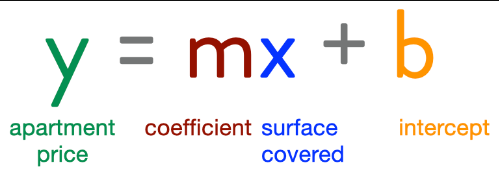

Como os cientistas de dados frequentemente trabalham com modelos lineares mais complicados, eles preferem escrever a equação como:

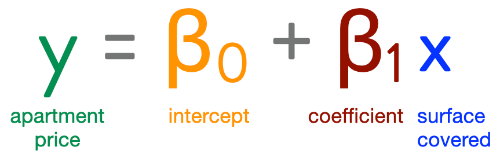

Independentemente de como escrevemos a equação, precisamos encontrar os valores que nosso modelo determinou para o intercepto e o coeficiente. Felizmente, todos os modelos treinados no scikit-learn armazenam essas informações no próprio modelo. Vamos começar com o intercepto.

## Intercepto
No contexto de um modelo linear, o intercepto (ou intercepto linear) é o valor da variável dependente (ou resposta) quando todas as variáveis independentes (ou preditoras) são iguais a zero.

Em outras palavras, é o ponto onde a linha de regressão cruza o eixo vertical (y) no gráfico.

O intercepto representa o valor inicial ou base do modelo, independentemente das variáveis independentes.

### Exercício:
Extraia o intercepto do seu modelo e atribua-o à variável `intercept`.

In [ ]:
intercept = round(model.intercept_, 2)
print(f'O intercepto do modelo é: {intercept}')

O intercepto do modelo é: 33660.77


## Coeficiente Linear
No contexto de um modelo linear, o coeficiente linear (ou simplesmente coeficiente) é o valor que multiplica uma variável independente (ou preditora) na equação do modelo.

Ele representa a inclinação da linha de regressão em relação à variável independente.

O coeficiente linear indica a mudança esperada na variável dependente (𝑦) para cada unidade de mudança na variável independente (x).

Em outras palavras, ele mostra como a variável dependente varia em resposta a mudanças na variável independente.
- Se o coeficiente for positivo, isso indica que um aumento na variável independente resulta em um aumento na variável dependente.
- Se for negativo, um aumento na variável independente resulta em uma diminuição na variável dependente.

### Exercício:
Extraia o coeficiente associado a "surface_covered_in_m2" em seu modelo e atribua-o à variável `coefficient`.

In [ ]:
coefficient = round(model.coef_[0], 2)
print(f'O coeficiente associado a "surface_covered_in_m2" é: {coefficient}')

O coeficiente associado a "surface_covered_in_m2" é: 1858.52


Agora que temos nosso intercepto e coeficiente, precisamos inseri-los em uma string para imprimir a equação completa.

In [ ]:
print(f'apt_price = {intercept} + {coefficient} * surface_covered') # y = B° + B¹ * X

apt_price = 33660.77 + 1858.52 * surface_covered


A equação pode funcionar para alguns públicos técnicos, mas a visualização é uma ferramenta de comunicação muito mais eficaz, especialmente para públicos não técnicos.

Então, vamos usar o gráfico de dispersão que fizemos no início desta lição e traçar a linha que a equação faria.

### Exercício
Adicione uma linha ao plot que mostre a relação entre as observações em X_train e as previsões do seu modelo y_pred_training. Certifique-se de que a cor da linha seja vermelha e que ela tenha o rótulo "Modelo Linear".

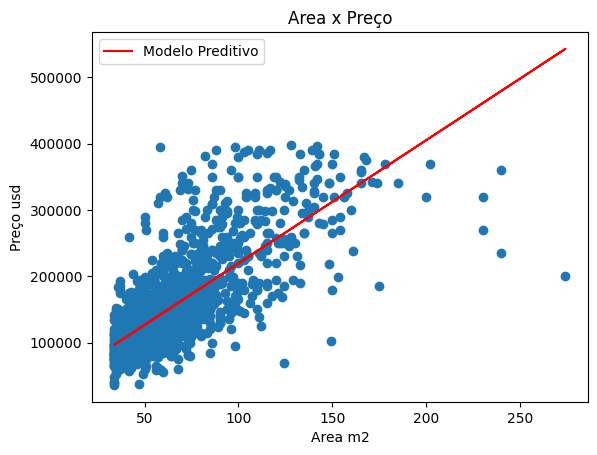

In [ ]:
plt.plot(X_train, y_pred_training, color = 'red',  label = 'Modelo Preditivo')
plt.scatter(X_train, y_train)
plt.xlabel('Area m2')
plt.ylabel('Preço usd')
plt.title('Area x Preço')
plt.legend();

In [ ]:
import plotly.express as px
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()